## _*LiH dissociation curve using VQE with UCCSD variational form*_

This notebook demonstrates using Qiskit Chemistry to plot graphs of the ground state energy of the Lithium Hydride (LiH) molecule over a range of inter-atomic distances using VQE and UCCSD. It is compared to the same energies as computed by the ExactEigensolver

This notebook populates a dictionary, that is a progammatic representation of an input file, in order to drive the Qiskit Chemistry stack. Such a dictionary can be manipulated programmatically and this is indeed the case here where we alter the molecule supplied to the driver in each loop.

This notebook has been written to use the PYSCF chemistry driver.

In [1]:
import numpy as np
import pylab
import copy
from qiskit.chemistry import QiskitChemistry

# Input dictionary to configure Qiskit Chemistry for the chemistry problem.
qiskit_chemistry_dict = {
    'driver': {'name': 'PYSCF'},
    'PYSCF': {'atom': '', 'basis': 'sto3g'},
    'operator': {'name': 'hamiltonian', 'qubit_mapping': 'parity',
                 'two_qubit_reduction': True, 'freeze_core': True, 'orbital_reduction': [-3, -2]},
    'algorithm': {'name': ''},
    'optimizer': {'name': 'SLSQP', 'maxiter': 1000},
    'variational_form': {'name': 'UCCSD'},
    'initial_state': {'name': 'HartreeFock'}
}
molecule = 'H .0 .0 -{0}; Li .0 .0 {0}'
algorithms = ['VQE', 'ExactEigensolver']

pts  = [x * 0.1  for x in range(6, 20)]
pts += [x * 0.25 for x in range(8, 16)]
pts += [4.0]
energies = np.empty([len(algorithms), len(pts)])
hf_energies = np.empty(len(pts))
distances = np.empty(len(pts))
dipoles     = np.empty([len(algorithms), len(pts)])
eval_counts = np.empty(len(pts))

print('Processing step __', end='')
for i, d in enumerate(pts):
    print('\b\b{:2d}'.format(i), end='', flush=True)
    qiskit_chemistry_dict['PYSCF']['atom'] = molecule.format(d/2) 
    for j in range(len(algorithms)):
        dict = copy.deepcopy(qiskit_chemistry_dict)
        dict['algorithm']['name'] = algorithms[j] 
        if algorithms[j] == 'ExactEigensolver':
            del dict['optimizer']
            del dict['variational_form']
            del dict['initial_state']
        solver = QiskitChemistry()
        result = solver.run(dict)
        energies[j][i] = result['energy']
        hf_energies[i] = result['hf_energy']
        dipoles[j][i]  = result['total_dipole_moment'] / 0.393430307
        if algorithms[j] == 'VQE':
            eval_counts[i] = result['algorithm_retvals']['eval_count']
    distances[i] = d
print(' --- complete')

print('Distances: ', distances)
print('Energies:', energies)
print('Hartree-Fock energies:', hf_energies)
print('VQE num evaluations:', eval_counts)

Processing step 22 --- complete
Distances:  [0.6  0.7  0.8  0.9  1.   1.1  1.2  1.3  1.4  1.5  1.6  1.7  1.8  1.9
 2.   2.25 2.5  2.75 3.   3.25 3.5  3.75 4.  ]
Energies: [[-7.3133458  -7.50092206 -7.63097823 -7.7208124  -7.78224239 -7.82359927
  -7.85069837 -7.86756328 -7.87700148 -7.8810157  -7.88107203 -7.87826815
  -7.87344011 -7.86723367 -7.86015319 -7.84104235 -7.82307636 -7.80861236
  -7.79836328 -7.79175303 -7.78771683 -7.7853196  -7.78391829]
 [-7.31334583 -7.50092209 -7.63097825 -7.72081241 -7.7822424  -7.82359928
  -7.85069838 -7.86756329 -7.87700149 -7.88101572 -7.88107204 -7.87826817
  -7.87344029 -7.86723396 -7.86015321 -7.84104271 -7.82307664 -7.8086124
  -7.79836343 -7.79175325 -7.78771697 -7.78531972 -7.78391847]]
Hartree-Fock energies: [-7.29954105 -7.48594487 -7.61577016 -7.70575334 -7.76736214 -7.80874318
 -7.83561583 -7.85195386 -7.86053866 -7.86335762 -7.86186477 -7.85714496
 -7.8500187  -7.84111204 -7.83090558 -7.80193896 -7.77087367 -7.74000074
 -7.7108299  -7.6

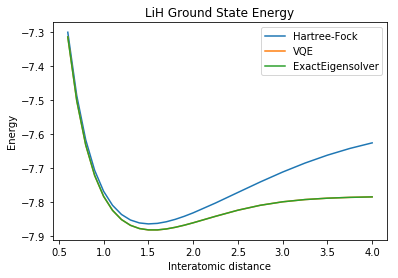

In [2]:
pylab.plot(distances, hf_energies, label='Hartree-Fock')
for j in range(len(algorithms)):
    pylab.plot(distances, energies[j], label=algorithms[j])
pylab.xlabel('Interatomic distance')
pylab.ylabel('Energy')
pylab.title('LiH Ground State Energy')
pylab.legend(loc='upper right');

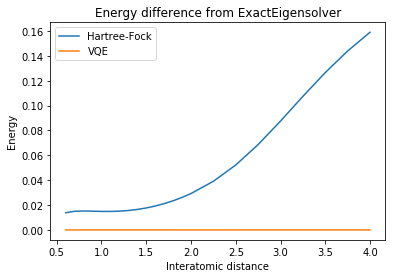

In [3]:
pylab.plot(distances, np.subtract(hf_energies, energies[1]), label='Hartree-Fock')
pylab.plot(distances, np.subtract(energies[0], energies[1]), label='VQE')
pylab.xlabel('Interatomic distance')
pylab.ylabel('Energy')
pylab.title('Energy difference from ExactEigensolver')
pylab.legend(loc='upper left');

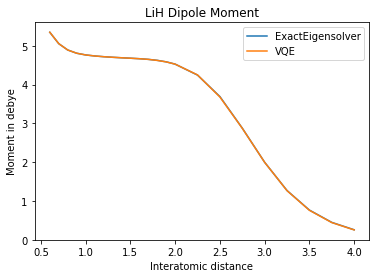

In [4]:
for j in reversed(range(len(algorithms))):
    pylab.plot(distances, dipoles[j], label=algorithms[j])
pylab.xlabel('Interatomic distance')
pylab.ylabel('Moment in debye')
pylab.title('LiH Dipole Moment')
pylab.legend(loc='upper right');

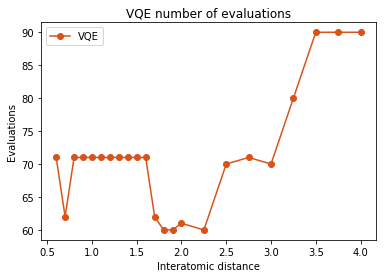

In [5]:
pylab.plot(distances, eval_counts, '-o', color=[0.8500, 0.3250, 0.0980], label='VQE')
pylab.xlabel('Interatomic distance')
pylab.ylabel('Evaluations')
pylab.title('VQE number of evaluations')
pylab.legend(loc='upper left');